# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.


1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
> The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease
> There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset


## 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.


## 4. Features
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
* chol - serum cholestoral in mg/dl
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg - resting electrocardiographic results
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
* slope - the slope of the peak exercise ST segment
* ca - number of major vessels (0-3) colored by flourosopy
* thal - thalium stress result
* target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

We're going to use pandas, matplotlib and numpy for data analysis and manipulation.

In [ ]:
# Import all tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

## Load data

In [ ]:
df = pd.read_csv("heart-disease.csv")
df.head()

FileNotFoundError: ignored

In [ ]:
df.shape

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you working with.

1. What question(s) are you tring to solve?
2. What kind of data we have and how we treat different types? 
3. What's missing form data and how do you deal with it? 
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [ ]:
df.head()

In [ ]:
# Let's find out how many of each class there
df["target"].value_counts()

In [ ]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [ ]:
df.info()

In [ ]:
# Are there any missing values?
df.isna().sum()

In [ ]:
 df.describe()

### Heart Disease Frequency according to Sex

In [ ]:
# Find out how many classes are there
df["sex"].value_counts()

In [ ]:
# Comapre target column with sex column
pd.crosstab(df["target"], df["sex"])

In [ ]:
# Create a plot of crosstab
pd.crosstab(df["target"], df["sex"]).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency according to Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

### Age vs. Max Heart Rate for Heart Disease

In [ ]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with postive examples
plt.scatter(df["age"][df["target"]==1],
            df["thalach"][df["target"]==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df["age"][df["target"]==0],
            df["thalach"][df["target"]==0],
            c="lightblue");

# Add some helpful info
plt.title("Age vs. Max Heart Rate for Heart Disease")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

In [ ]:
# Chick the distribution of the age column with histogram
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type


In [ ]:
pd.crosstab(df.cp, df.target)

In [ ]:
# Make the crosstabe more visiual
pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                   figsize=(10, 6), 
                                   color=["salmon", "lightblue"])

# Add some commuication
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [ ]:
df.head()

In [ ]:
# Make a correlation matrix
df.corr()

In [ ]:
# Let's make our correlation matrix a little prettier
corr_matix = df.corr()
fig, ax = plt.subplots(figsize=(20, 12))
ax = sns.heatmap(corr_matix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")

## 5. Modlling

In [ ]:
df.head() 

In [ ]:
# Split the data into x & y
x, y = df.drop("target", axis=1), df["target"]

# Split into train and test sets
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.2)

In [ ]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [ ]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64, 242)

Now've got our data split into training and test sets, it time to build a machine learning model.

We'll train it (find the patterns) on the training sets.

And we'll test it (use the patterns) on the test set.

We'er going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours classifier
3. RandomForestClassifier

In [ ]:
# Put models in dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}


# Create a function to fit and score models
def fit_and_score(models, x_train, y_trian, x_test, y_test):
  """
  Fits and evaluates given machine learning models.
  models : a dict of different Scikit-learn machine learning models
  x_train : training data (no labels)
  x_test : testing data (no labels)
  y_train : training labels
  y_test : test labels
  """

  # Set random seed
  np.random.seed(42)

  # Make a dictionary to keep model scores
  model_scores = {}

  # Loop through models
  for model_name, model in models.items():
    # Fit the model to the data
    clf = model.fit(x_train, y_train)
    # Evaluate the model and append its score to model_score
    model_scores[model_name] = clf.score(x_test, y_test)

  return model_scores

In [ ]:
models_score = fit_and_score(models=models, 
                             x_train=x_train, 
                             y_trian=y_train,
                             x_test=x_test,
                             y_test=y_test)
models_score

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

### Model Comparison

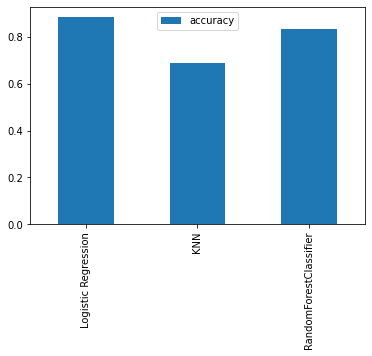

In [ ]:
model_compare = pd.DataFrame(models_score, index=["accuracy"])
model_compare.T.plot.bar();

Now've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix 
* Cross-validation
* Precision 
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning (by hand)

In [ ]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
  knn.set_params(n_neighbors=i)

  # Fit the algorithm
  knn.fit(x_train, y_train)

  # Update the train_scores list
  train_scores.append(knn.score(x_train, y_train))

  # Update the test scores list
  test_scores.append(knn.score(x_test, y_test))

In [ ]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [ ]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


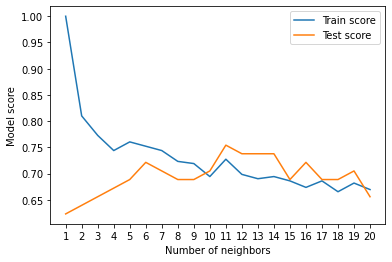

In [ ]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend();

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [ ]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, 
let's tune them using RandomizedSearchCV.

In [ ]:
# Tune LogisticRegression
np.random.seed(42)

# Setup randomizedsearchcv for logisticregression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [ ]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()

In [ ]:
np.random.seed(42)

rf_rc = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

rf_rc.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
rf_rc.best_params_

{'n_estimators': 10,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_depth': 3}

In [ ]:
rf_rc.score(x_test, y_test)

0.8360655737704918

## Hyperparameter tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [ ]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear", ]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model for LogisticRegression
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
gs_log_reg.score(x_test, y_test)

0.8852459016393442

## Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC Score
* confusion Matrix
* Classification Report
* Precision
* Recall
* F1 Score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [ ]:
# Make predictions with tuned model
y_pred = gs_log_reg.predict(x_test)
y_pred_proba = gs_log_reg.predict_proba(x_test)

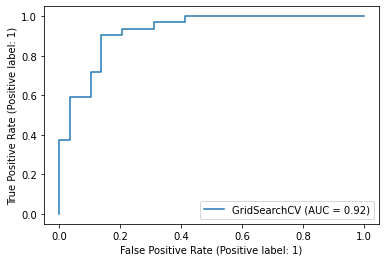

In [ ]:
# Plot ROC Curve and calculate AUC metrics
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test);

In [ ]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred))

[[25  4]
 [ 3 29]]


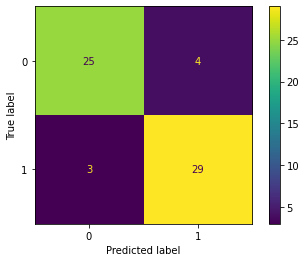

In [ ]:
# plot confusion matrix
ConfusionMatrixDisplay.from_estimator(gs_log_reg, x_test, y_test);

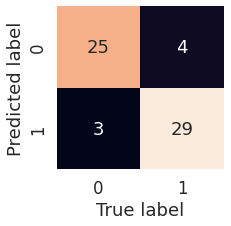

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_true, y_preds):
  """
  Plots a nice looking confusion matrix using Seaborn's heatmap
  """

  fig, ax = plt.subplots(figsize=(3, 3))
  ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                   annot=True,
                   cbar=False)
  plt.xlabel("True label")
  plt.ylabel("Predicted label")

plot_conf_mat(y_test, y_pred)

Now we've got a ROC curve, and AUC metrics and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

We're going to calculate precision, recall and f1-score of our model using cross-validation and to do so we'll using `cross_val_score()` 

In [ ]:
# Check best hyperparameters parameters 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [ ]:
# Cross-validate accuracy
cv_acc = cross_val_score(clf, 
                         x, 
                         y, 
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [ ]:
# Cross-validate precision
cv_precision = cross_val_score(clf, 
                         x, 
                         y, 
                         scoring="precision")
cv_precision

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [ ]:
# Cross-validate recall
cv_recall = cross_val_score(clf, 
                         x, 
                         y, 
                         scoring="recall")
cv_recall

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [ ]:
# Cross-validate f1-score
cv_f1 = cross_val_score(clf, 
                         x, 
                         y, 
                         scoring="f1")
cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [ ]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": np.mean(cv_acc),
                           "Percision": np.mean(cv_precision),
                           "Recall": np.mean(cv_recall),
                           "F1": np.mean(cv_f1)},
                          index=[0])
cv_metrics

,Accuracy,Percision,Recall,F1
0,0.844699,0.820794,0.921212,0.867301


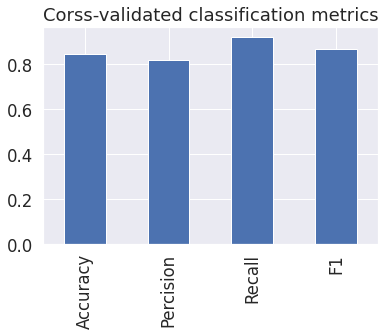

In [ ]:
cv_metrics.T.plot.bar(title="Corss-validated classification metrics",
                      legend=False);

### Feature Importance 

Feature Importance is another way as asking, "Which features contributed most to the outcomes of the mdoel and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for " (MODEL NAME) feature importance". 

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(x_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [ ]:
# Check coef_
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [ ]:
# Match coef's of the features to columns
feature_dic = dict(zip(df.columns, list(clf.coef_[0])))
feature_dic

{'age': 0.0032076883508599633,
 'sex': -0.8606204883695241,
 'cp': 0.660014324982524,
 'trestbps': -0.01155970600550047,
 'chol': -0.0016649614843449207,
 'fbs': 0.040172360271308105,
 'restecg': 0.31603405294617176,
 'thalach': 0.02458922341328129,
 'exang': -0.604701713592625,
 'oldpeak': -0.5679545646616215,
 'slope': 0.4508539209693025,
 'ca': -0.6373332766360461,
 'thal': -0.6755509369619848}

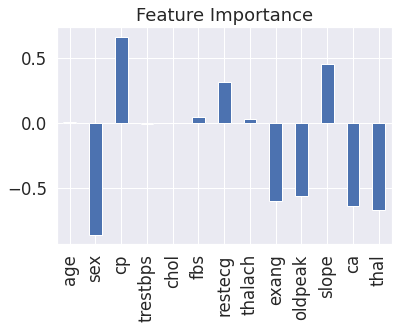

In [ ]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dic, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [ ]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [ ]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. Experimentation

If you haven't hit your evaluation metics yet... ask yourself...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could we imporve the current models? (beyond what we've done so far)
* If you model is good enough (you have hit your evaluation metric) how would you export it and share it with others?